# NiclaSenseME_check_sensorID
This code uploads the `NiclaSenseME_check_sensorIDs.ino` sketch (located in the same folder) to the connected Nicla Sense ME. Then reads the data and plots it.
Only the Nicla Sense ME should be connected, for the port to be automatically detected.

In [1]:
import json
import serial
import pandas as pd
import re

import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
data_string= !arduino-cli board list --format json
#print(data_string)

In [3]:
data_list = ''.join(data_string)
data_json = json.loads(data_list)

# Extract the COM port for the Nicla Sense ME
for item in data_json:
    if 'matching_boards' in item:
        print("COM Port for Nicla Sense ME:", item['port']['address'])
        niclaSenseMEPort = item['port']['address']

COM Port for Nicla Sense ME: COM9


In [4]:
!arduino-cli compile -u -p {niclaSenseMEPort} --fqbn arduino:mbed_nicla:nicla_sense ".\NiclaSense_check_sensorIDs.ino" --verbose

print(niclaSenseMEPort)

FQBN: arduino:mbed_nicla:nicla_sense
Using board 'nicla_sense' from platform in folder: C:\Users\user\AppData\Local\Arduino15\packages\arduino\hardware\mbed_nicla\4.0.8
Using core 'arduino' from platform in folder: C:\Users\user\AppData\Local\Arduino15\packages\arduino\hardware\mbed_nicla\4.0.8

Detecting libraries used...
C:\Users\user\AppData\Local\Arduino15\packages\arduino\tools\arm-none-eabi-gcc\7-2017q4/bin/arm-none-eabi-g++ -c -w -g3 -nostdlib @C:\Users\user\AppData\Local\Arduino15\packages\arduino\hardware\mbed_nicla\4.0.8\variants\NICLA/defines.txt @C:\Users\user\AppData\Local\Arduino15\packages\arduino\hardware\mbed_nicla\4.0.8\variants\NICLA/cxxflags.txt -DARDUINO_ARCH_NRF52832 -mcpu=cortex-m4 -mfloat-abi=softfp -mfpu=fpv4-sp-d16 -w -x c++ -E -CC -DARDUINO=10607 -DARDUINO_NICLA -DARDUINO_ARCH_MBED_NICLA -DARDUINO_ARCH_MBED -DARDUINO_LIBRARY_DISCOVERY_PHASE=1 -IC:\Users\user\AppData\Local\Arduino15\packages\arduino\hardware\mbed_nicla\4.0.8\cores\arduino -IC:\Users\user\AppDa

loading library from D:\Users\user\Documents\Arduino\libraries\__MACOSX: invalid library: no header files found
Open On-Chip Debugger 0.11.0+dev-gab95bac57-dirty (2021-05-11-10:45)
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
debug_level: 2

adapter speed: 1000 kHz

Info : CMSIS-DAP: SWD  Supported
Info : CMSIS-DAP: FW Version = v1.0
Info : CMSIS-DAP: Serial# = 9BE0BC2D
Info : CMSIS-DAP: Interface Initialised (SWD)
Info : SWCLK/TCK = 1 SWDIO/TMS = 1 TDI = 0 TDO = 0 nTRST = 0 nRESET = 1
Info : CMSIS-DAP: Interface ready


Alternatives for Wire.h: [Wire]
ResolveLibrary(Wire.h)
  -> candidates: [Wire]
Alternatives for Nicla_System.h: [Nicla_Sense_System@1.0]
ResolveLibrary(Nicla_System.h)
  -> candidates: [Nicla_Sense_System@1.0]
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\BLEHandler.cpp
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\BoschParser.cpp
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\BoschSensortec.cpp
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\DFUManager.cpp
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\EslovHandler.cpp
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\libraries\Arduino_BHY2\src\bosch\bhy2.c
Using cached library dependencies for file: D:\Users\user\Documents\Arduino\


Info : clock speed 1000 kHz
Info : SWD DPIDR 0x2ba01477
Info : nrf52.cpu: hardware has 6 breakpoints, 4 watchpoints
Info : starting gdb server for nrf52.cpu on 3333
Info : Listening on port 3333 for gdb connections
target halted due to debug-request, current mode: Thread 
xPSR: 0x01000000 pc: 0x00006dd0 msp: 0x20010000
target halted due to debug-request, current mode: Thread 
xPSR: 0x01000000 pc: 0x00006dd0 msp: 0x20010000
** Programming Started **
Info : nRF52832-CIAA(build code: E0) 512kB Flash, 64kB RAM
Info : Padding image section 0 at 0x0005a714 with 4 bytes
Warn : Adding extra erase range, 0x0005b5f8 .. 0x0005bfff
** Programming Finished **
shutdown command invoked


In [5]:
ser = serial.Serial(
    port=niclaSenseMEPort,  # or something like 'COM5' for Windows
    baudrate=9600,
    timeout=1
)

In [6]:

# Define a file to save the recorded data
file_path = "serial_data.txt"
with open(file_path, "w") as file:
    while True:
        # Read data from the serial port
        data = ser.readline()
        
        # Convert bytes to string and remove leading/trailing whitespaces
        data_str = data.decode().strip()
        
        # Write data to the file
        file.write(data_str + "\n")
        
        # Print the data to the console
        print(data_str)

        # Check if the received data contains "END"
        if "END" in data_str:
            break

# Close the serial port
ser.close()

                                                                                                                                                                                                                                                               








-------
Checking type Sensor
Checking 48
Sample n0
Sample n1
Sample n2
Sample n3
Sample n4
Sample n5
Sample n6
Sample n7
Sample n8
Sample n9
Sample n10
Sample n11
Sample n12
Sample n13
Sample n14
Sample n15
Sample n16
Sample n17
Sample n18
Sample n19
Sample n20
Sample n21
Sample n22
Sample n23
Sample n24
Sample n25
Sample n26
Sample n27
Sample n28
Sample n29
Sample n30
Sample n31
Sample n32
Sample n33
Sample n34
Sample n35
Sample n36
Sample n37
Sample n38
Sample n39
Sample n40
Sample n41
Sample n42
Sample n43
Sample n44
Sample n45
Sample n46
Sample n47
Sample n48
Sample n49
Sample n50
Sample n51
Sample n52
Sample n53
Sample n54
Sample n55
Sample n56
Sample n57
Sample n58
Sample n59
Sample n60
Sample n61
Sample n62
Sample n63
S

In [7]:
# Define regular expressions to match the relevant patterns in the data
header_pattern = re.compile(r'Checking (\d+)')
sample_pattern = re.compile(r'Sample n(\d+) Data value: ([\d.-]+)')
no_data_pattern = re.compile(r'Sample n(\d+)')

# Initialize lists to store the extracted data
check_values = []
sample_numbers = []
data_values = []
current_check_value = None

# Open and read the file
with open('serial_data.txt', 'r') as file:
    lines = file.readlines()

# Iterate through the lines in the file
for line in lines:
    header_match = header_pattern.match(line)
    sample_match = sample_pattern.match(line)
    no_data_match = no_data_pattern.match(line)

    if header_match:
        current_check_value = int(header_match.group(1))
    elif sample_match:
        check_values.append(current_check_value)
        sample_numbers.append(int(sample_match.group(1)))
        data_values.append(float(sample_match.group(2)))
    elif no_data_match:
        check_values.append(current_check_value)
        sample_numbers.append(int(no_data_match.group(1)))
        data_values.append(None)

# Create a DataFrame
data = {
    'Sensor ID': check_values,
    'Sample': sample_numbers,
    'Data value': data_values
}
df = pd.DataFrame(data)

print(df)

      Sensor ID  Sample  Data value
0            48       0         NaN
1            48       1         NaN
2            48       2         NaN
3            48       3         NaN
4            48       4         NaN
...         ...     ...         ...
2795        143      95         NaN
2796        143      96         NaN
2797        143      97         NaN
2798        143      98         NaN
2799        143      99         NaN

[2800 rows x 3 columns]


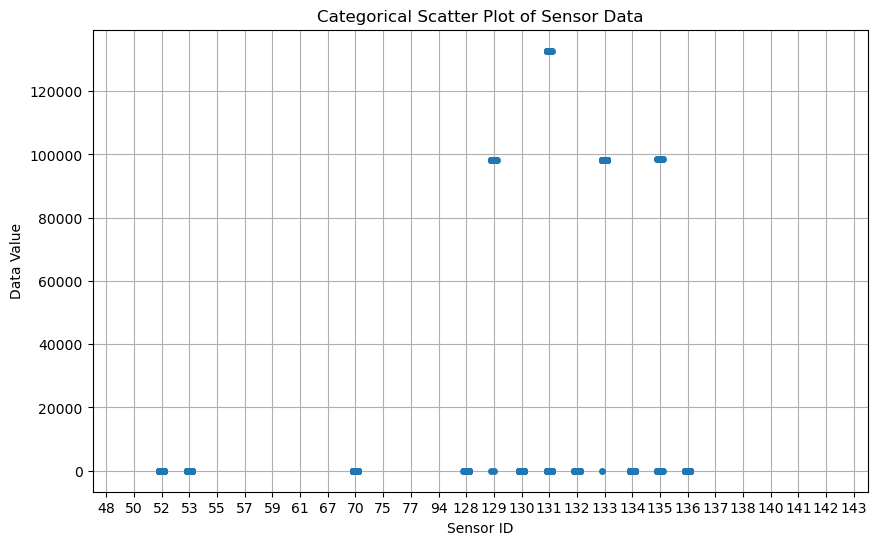

In [11]:
# Convert 'Sensor ID' to a categorical variable
df['Sensor ID'] = df['Sensor ID'].astype('category')

# Plot the DataFrame
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Sensor ID', y='Data value', jitter=True)
plt.title('Categorical Scatter Plot of Sensor Data')
plt.xlabel('Sensor ID')
plt.ylabel('Data Value')
plt.grid(True)
plt.show()

In [9]:
# Calculate the average data value for each Sensor ID
sensor_data_avg = df.groupby('Sensor ID')['Data value'].mean().reset_index()

# Display the table
print(sensor_data_avg)

   Sensor ID   Data value
0         48          NaN
1         50          NaN
2         52      0.00000
3         53      0.00000
4         55          NaN
5         57          NaN
6         59          NaN
7         61          NaN
8         67          NaN
9         70      0.98000
10        75          NaN
11        77          NaN
12        94          NaN
13       128     10.59030
14       129  96140.77992
15       130      0.00000
16       131  54439.80000
17       132     11.38280
18       133  97124.18622
19       134      0.00000
20       135  41369.58000
21       136      0.00000
22       137          NaN
23       138          NaN
24       140          NaN
25       141          NaN
26       142          NaN
27       143          NaN


In [14]:
success_sensors = []
failure_sensors = []

for index, row in sensor_data_avg.iterrows():
    if pd.isna(row['Data value']):
        failure_sensors.append(row['Sensor ID'])
    else:
        success_sensors.append(row['Sensor ID'])

# Print the results
print(f"Sensors {', '.join(map(str, success_sensors))} provided a valid numerical output")
print(f"Sensors {', '.join(map(str, failure_sensors))} failed at providing a valid numerical output")


Sensors 52, 53, 70, 128, 129, 130, 131, 132, 133, 134, 135, 136 provided a valid numerical output
Sensors 48, 50, 55, 57, 59, 61, 67, 75, 77, 94, 137, 138, 140, 141, 142, 143 failed at providing a valid numerical output
